REF : https://github.com/ryuichiueda/probrobo2017/blob/master/04.ipynb

In [1]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt

# Landmarks

In [2]:
actual_landmarks = [np.array([-0.5,0.0]),np.array([0.5,0.0]),np.array([0.0,0.5])]

def draw_landmarks(landmarks):
    xs = [ e[0] for e in landmarks]
    ys = [ e[1] for e in landmarks]
    plt.scatter(xs,ys,s=300,marker="*",label="landmarks",color="orange")

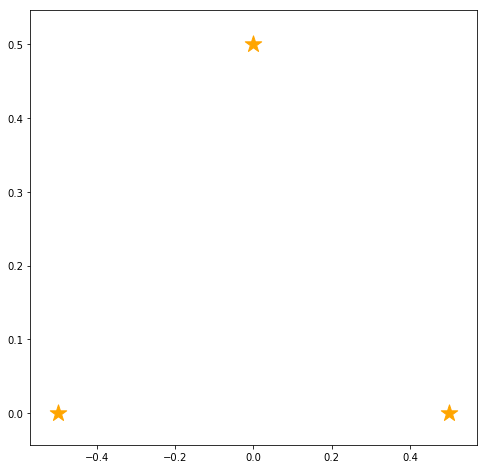

In [3]:
fig, world = plt.subplots(figsize=(8, 8))
draw_landmarks(actual_landmarks)
plt.show()

# Robot Position

In [4]:
actual_x = np.array([0.3, 0.2, np.deg2rad(20)])
def draw_robot(pose):
    plt.quiver([pose[0]],[pose[1]],[math.cos(pose[2])],[math.sin(pose[2])],color="red",label="actual robot motion")

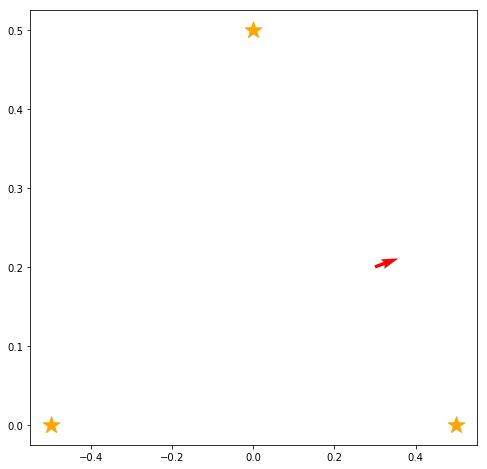

In [5]:
fig, world = plt.subplots(figsize=(8, 8))
draw_robot(actual_x)
draw_landmarks(actual_landmarks)
plt.show()

In [6]:
def relative_landmark_pos(pose,landmark):
    x, y, theta = pose
    lx, ly = landmark
    distance = math.sqrt((x - lx)**2 + (y - ly)**2)
    direction = math.atan2(ly - y, lx - x) - theta
    
    return (distance, direction, lx, ly)

In [7]:
measurements = [ relative_landmark_pos(actual_x,e) for e in actual_landmarks]
print(measurements)

[(0.8246211251235323, -3.2456798408617948, -0.5, 0.0), (0.28284271247461906, -1.1344640137963142, 0.5, 0.0), (0.4242640687119285, 2.0071286397934789, 0.0, 0.5)]


In [8]:
def draw_observation(pose, measurement):
    x, y, theta = pose
    distance, direction, lx, ly = measurement
    lx = distance * math.cos(theta + direction) + x
    ly = distance * math.sin(theta + direction) + y
    plt.plot([pose[0], lx], [pose[1], ly], color="pink")
    
def draw_observations(pose, measurements):
    for m in measurements:
        draw_observation(pose, m)

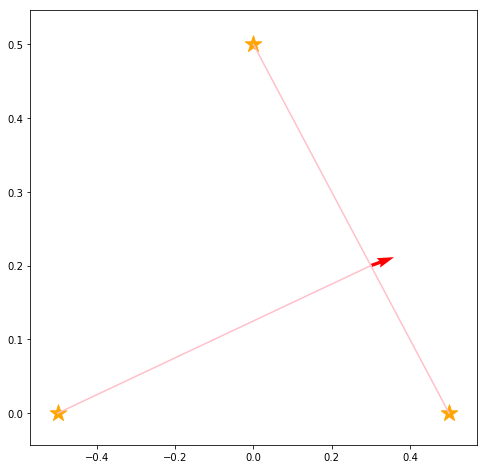

In [9]:
fig, world = plt.subplots(figsize=(8, 8))
draw_landmarks(actual_landmarks)
draw_robot(actual_x)
draw_observations(actual_x, measurements)
plt.show()

In [10]:
def observation(pose, landmark):
    actual_distance,actual_direction,lx,ly = relative_landmark_pos(pose,landmark)
    if (math.cos(actual_direction) < 0.0):
        return None
    measured_distance = random.gauss(actual_distance, actual_distance * 0.1)
    measured_direction = random.gauss(actual_direction, np.deg2rad(5))
    return (measured_distance, measured_direction, lx, ly)

def observations(pose, landmarks):
    measurements = []
    for landmark in landmarks:
        measurement = observation(pose, landmark)
        if measurement == None:
            pass
        else:
            measurements.append(measurement)
    return measurements

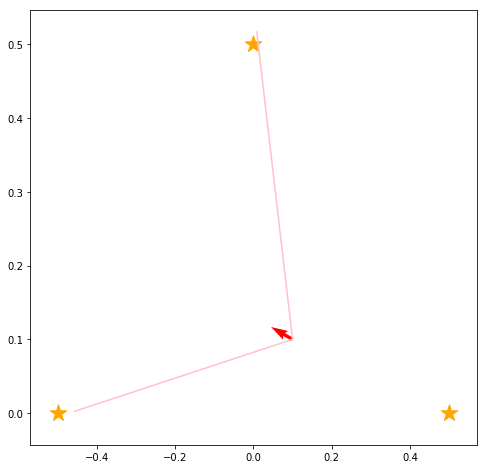

In [11]:
fig, world = plt.subplots(figsize=(8, 8))
actual_x = np.array([0.1,0.1,np.deg2rad(150)])
measurements = observations(actual_x, actual_landmarks)

draw_landmarks(actual_landmarks)
draw_robot(actual_x)
draw_observations(actual_x, measurements)
plt.show()